In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


filename = "out/oitaven/seed0009.raw"
filename = "out/oitaven/fakes_grid.raw"
# filename = "data/oitaven/oitaven.raw"

# Leer el archivo RAW
num_channels, image_height, image_width = np.fromfile(filename, count=3, dtype=np.uint32)
image_data = np.fromfile(filename, count=num_channels * image_height * image_width, offset=3 * 4, dtype=np.uint32)

image_data = image_data.astype(np.float64)
preprocessing.minmax_scale(image_data, feature_range=(0, 1), copy=False)

img = image_data.reshape(image_width, image_height, num_channels)
img_vis = np.clip(img * 255, 0, 255).astype(np.uint8)

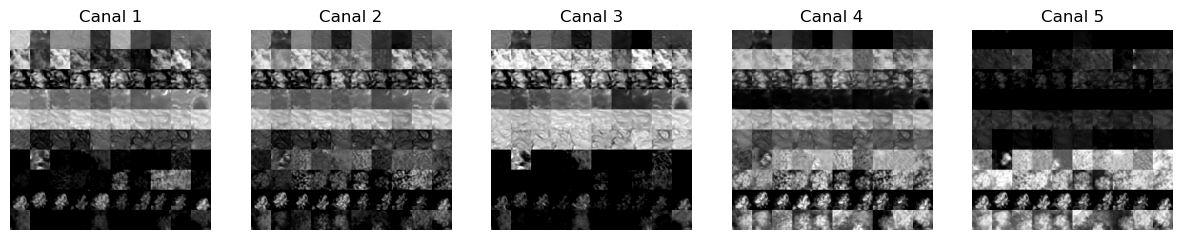

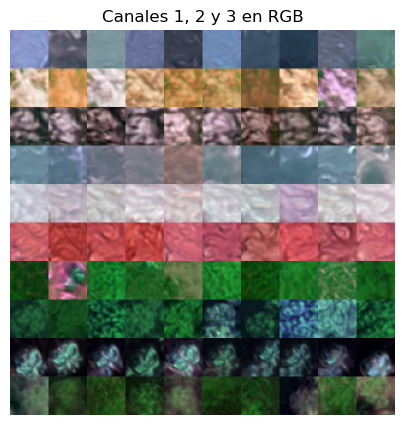

In [ ]:
img_rgb = img_vis[:, :, [2, 1, 0]]

# Mostrar los 5 canales
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(img_vis[:, :, i], cmap="gray", vmin=42, vmax=247)
    axes[i].set_title(f"Channel {i+1}")
    axes[i].axis("off")
plt.show()

# Mostrar los tres primeros canales en RGB
plt.figure(figsize=(5, 5))
plt.imshow(img_rgb)
plt.title("Channels 1, 2 and 3 RGB")
plt.axis("off")
plt.show()